In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import mglearn

%matplotlib inline

In [3]:
cancer = load_breast_cancer()

In [4]:
import pandas as pd
raw_data=pd.read_csv('data.csv', delimiter=',')

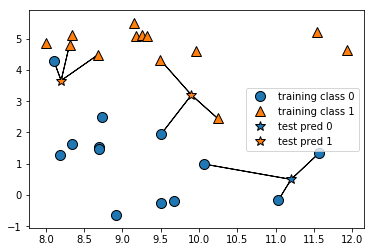

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
print('Accuracy of KNN n-5, on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN n-5, on the test set: {:.3f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN n-5, on the training set: 0.946
Accuracy of KNN n-5, on the test set: 0.930


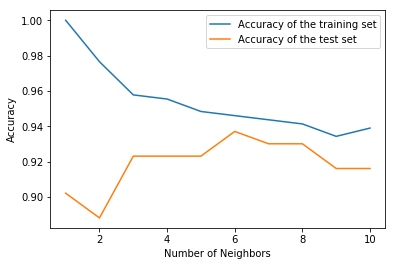

In [8]:
# Resplit the data, with a different randomization (inspired by Muller & Guido ML book - https://www.amazon.com/dp/1449369413/)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# Create two lists for training and test accuracies
training_accuracy = []
test_accuracy = []

# Define a range of 1 to 10 (included) neighbors to be tested
neighbors_settings = range(1,11)

# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Visualize results - to help with deciding which n_neigbors yields the best results (n_neighbors=6, in this case)
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()